# QMSS5074GR - Final Project (3rd)


### Your Grp ID: 8
### Your UNIs: yh3846, jl6938, rh3243
### Your Full Names: Yizhao Hong, Jason Lee, Rick Hua
### Public GitHub Repo: https://github.com/hongyizhao00/nlp-sentiment-gpt-glove-bert.git

## Description

## Part 1 – Data Ingestion & Preprocessing

1. **Data Loading**  
   - Acquire the Stanford Sentiment Treebank dataset.  
   - Split into training, validation and test sets with stratified sampling to preserve class balance.  
   - Clearly document your splitting strategy and resulting dataset sizes.

2. **Text Cleaning & Tokenization**  
   - Implement a reusable preprocessing pipeline that handles at least:  
     - HTML removal, lowercasing, punctuation stripping  
     - Vocabulary pruning (e.g., rare words threshold)  
     - Tokenization (character- or word-level)  
   - Expose this as a function/class so it can be saved and re-loaded for inference.

3. **Feature Extraction**  
   - **Traditional**: Build a TF-IDF vectorizer (or n-gram count) pipeline.  
   - **Neural**: Prepare sequences for embedding—pad/truncate to a fixed length.  
   - Save each preprocessor (vectorizer/tokenizer) to disk.

---

## Part 2 – Exploratory Data Analysis (EDA)

1. **Class Distribution**  
   - Visualize the number of positive vs. negative reviews.  
   - Compute descriptive statistics on review lengths (mean, median, IQR).  

2. **Text Characteristics**  
   - Plot the 20 most frequent tokens per sentiment class.  
   - Generate word clouds (or bar charts) highlighting key terms for each class.  

3. **Correlation Analysis**  
   - Analyze whether review length correlates with sentiment.  
   - Present findings numerically and with at least one visualization.

---

## Part 3 – Baseline Traditional Models

1. **Logistic Regression & SVM**  
   - Train at least two linear models on your TF-IDF features (e.g., logistic regression, linear SVM).  
   - Use cross-validation (≥ 5 folds) on the training set to tune at least one hyperparameter.  

2. **Random Forest & Gradient Boosting**  
   - Train two tree-based models (e.g., Random Forest, XGBoost) on the same features.  
   - Report feature-importance for each and discuss any notable tokens.

3. **Evaluation Metrics**  
   - Compute accuracy, precision, recall, F1-score, and ROC-AUC on the **held-out test set**.  
   - Present all results in a single comparison table.

---

## Part 4 – Neural Network Models

1. **Simple Feed-Forward**  
   - Build an embedding layer + a dense MLP classifier.  
   - Ensure you freeze vs. unfreeze embeddings in separate runs.

2. **Convolutional Text Classifier**  
   - Implement a 1D-CNN architecture (Conv + Pooling) for sequence data.  
   - Justify your choice of kernel sizes and number of filters.

3. **Recurrent Model (Optional)**  
   - (Stretch) Add an RNN or Bi-LSTM layer and compare performance/time vs. CNN.

---

## Part 5 – Transfer Learning & Advanced Architectures

1. **Pre-trained Embeddings**  
   - Retrain one network using pre-trained GloVe (or FastText) embeddings.  
   - Compare results against your from-scratch embedding runs.

2. **Transformer Fine-Tuning**  
   - Fine-tune a BERT-family model on the training data.  
   - Clearly outline your training hyperparameters (learning rate, batch size, epochs).


---

## Part 6 – Hyperparameter Optimization

1. **Search Strategy**  
   - Use a library (e.g., Keras Tuner, Optuna) to optimize at least two hyperparameters of one deep model.  
   - Describe your search space and stopping criteria.

2. **Results Analysis**  
   - Report the best hyperparameter configuration found.  
   - Plot validation-loss (or metric) vs. trials to illustrate tuning behavior.

---

## Part 7 – Final Comparison & Error Analysis

1. **Consolidated Results**  
   - Tabulate test-set performance for **all** models (traditional, neural, transfer-learned).  
   - Highlight top‐performing model overall and top in each category.

2. **Statistical Significance**  
   - Perform a significance test (e.g., McNemar’s test) between your best two models.  

3. **Error Analysis**  
   - Identify at least 20 examples your best model misclassified.  
   - For a sample of 5, provide the raw text, predicted vs. true label, and a short discussion of each error—what linguistic artifact might have confused the model?

---

## Part 8 – Optional Challenge Extensions

- Implement data augmentation for text (back-translation, synonym swapping) and measure its impact.  
- Integrate a sentiment lexicon feature (e.g., VADER scores) into your models and assess whether it improves predictions.  
- Deploy your best model as a simple REST API using Flask or FastAPI and demo it on a handful of user‐submitted reviews.

---

## Start coding .....

ps. the code below is just an filler code with some tips on the top it.


But the main project requirements are listed above in the description.

## Part 1 – Data Ingestion & Preprocessing


1. **Data Loading**  
    - Acquire the Stanford Sentiment Treebank dataset.
    - Split into training, validation, and test sets with stratified sampling to preserve class balance.
    - Clearly document your splitting strategy and resulting dataset sizes.
    

In [ ]:
# Load data (example)
import pandas as pd


# IMPORT DATA
!git clone https://github.com/YJiangcm/SST-2-sentiment-analysis.git

train_df = pd.read_csv('./SST-2-sentiment-analysis/data/train.tsv', sep='\t', names=['label', 'sentence'], header=0)
val_df = pd.read_csv('./SST-2-sentiment-analysis/data/dev.tsv', sep='\t', names=['label', 'sentence'], header=0)
test_df = pd.read_csv('./SST-2-sentiment-analysis/data/test.tsv', sep='\t', names=['label', 'sentence'], header=0)

train_df.head()





fatal: destination path 'SST-2-sentiment-analysis' already exists and is not an empty directory.


,label,sentence
0,0,apparently reassembled from the cutting-room f...
1,0,they presume their audience wo n't sit still f...
2,1,this is a visually stunning rumination on love...
3,1,jonathan parker 's bartleby should have been t...
4,1,campanella gets the tone just right -- funny i...



2. **Text Cleaning & Tokenization**  
    - Implement a reusable preprocessing pipeline that handles at least:  
        - HTML removal, lowercasing, punctuation stripping  
        - Vocabulary pruning (e.g., rare words threshold)  
        - Tokenization (character- or word-level)  
    - Expose this as a function/class so it can be saved and re-loaded for inference.
    

In [ ]:
import re
import string
from collections import Counter
from typing import List
import nltk
import pickle

nltk.download('punkt')
from nltk.tokenize import word_tokenize

class TextPreprocessor:
    def __init__(self, min_word_freq=2, level='word'):
        self.min_word_freq = min_word_freq
        self.level = level
        self.vocab = set()
        self.word_counts = Counter()

    def clean_text(self, text: str) -> str:
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        return text

    def tokenize(self, text: str) -> List[str]:
        if self.level == 'word':
            return word_tokenize(text)
        elif self.level == 'char':
            return list(text)
        else:
            raise ValueError("Unsupported tokenization level")

    def fit(self, texts: List[str]):
        for text in texts:
            cleaned = self.clean_text(text)
            tokens = self.tokenize(cleaned)
            self.word_counts.update(tokens)
        # Build vocabulary of words that meet the frequency threshold
        self.vocab = {word for word, freq in self.word_counts.items() if freq >= self.min_word_freq}

    def transform(self, text: str) -> List[str]:
        cleaned = self.clean_text(text)
        tokens = self.tokenize(cleaned)
        return [token for token in tokens if token in self.vocab]

    def fit_transform(self, texts: List[str]) -> List[List[str]]:
        self.fit(texts)
        return [self.transform(text) for text in texts]

    def save(self, path='text_preprocessor.pkl'):
        with open(path, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load(path='text_preprocessor.pkl'):
        with open(path, 'rb') as f:
            return pickle.load(f)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Using our dataset
import re
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def clean_text(text):
    text = str(text)
    text = re.sub(r'<.*?>', '', text)  # RemoveHTML
    text = text.lower()                # Lower
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Clean Text
train_df['cleaned_text'] = train_df['sentence'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



3. **Feature Extraction**  
    - **Traditional**: Build a TF-IDF vectorizer (or n-gram count) pipeline.  
    - **Neural**: Prepare sequences for embedding—pad/truncate to a fixed length.  
    - Save each preprocessor (vectorizer/tokenizer) to disk.
    

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle


tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_text'])

print("TF-IDF shape:", X_tfidf.shape)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

TF-IDF shape: (6919, 5000)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initial tokenizer（OOV）
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['cleaned_text'])

# Transorm to sequences
sequences = tokenizer.texts_to_sequences(train_df['cleaned_text'])

# padding
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

# shape
print("Padded shape:", padded_sequences.shape)

# save tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

Padded shape: (6919, 50)


## Part 2 – Exploratory Data Analysis (EDA)


1. **Class Distribution**  
    - Visualize the number of positive vs. negative reviews.  
    - Compute descriptive statistics on review lengths (mean, median, IQR).
    

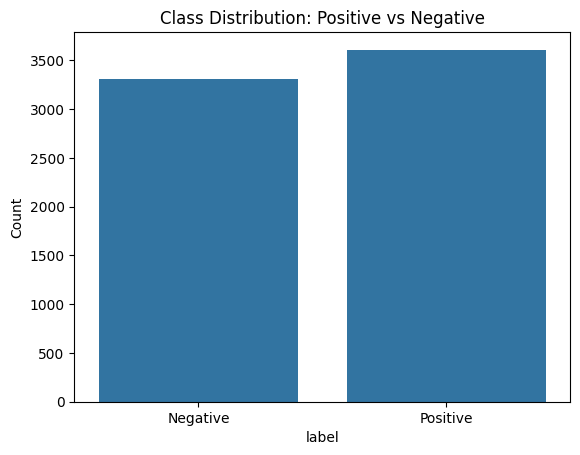

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=train_df, x='label')
plt.title('Class Distribution: Positive vs Negative')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.ylabel('Count')
plt.show()


In [ ]:
# Compute length of each review by word count
train_df['review_length'] = train_df['cleaned_text'].apply(lambda x: len(x.split()))

# Summary statistics
mean_length = train_df['review_length'].mean()
median_length = train_df['review_length'].median()
q1 = train_df['review_length'].quantile(0.25)
q3 = train_df['review_length'].quantile(0.75)
iqr = q3 - q1

print("Review Length Statistics:")
print(f"Mean: {mean_length:.2f}")
print(f"Median: {median_length}")
print(f"IQR (Q3 - Q1): {iqr}")


Review Length Statistics:
Mean: 17.16
Median: 17.0
IQR (Q3 - Q1): 12.0


**2.Text Characteristics**

Plot the 20 most frequent tokens per sentiment class.
Generate word clouds (or bar charts) highlighting key terms for each class.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-8-024756237452>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pos_df, x='count', y='token', palette="Greens_d")


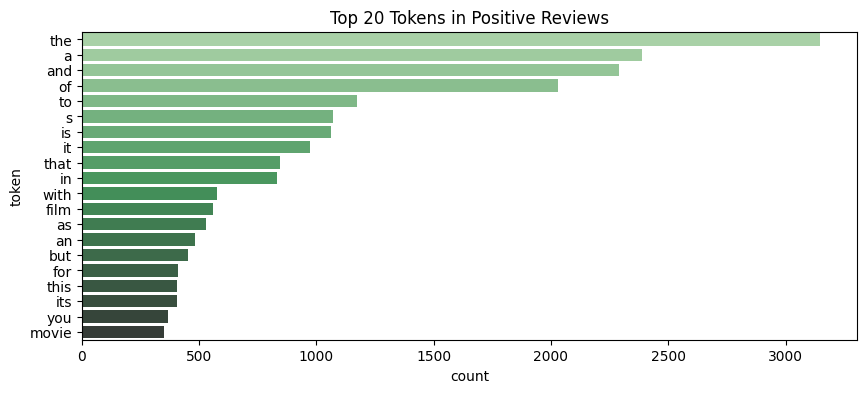

<ipython-input-8-024756237452>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_neg_df, x='count', y='token', palette="Reds_d")


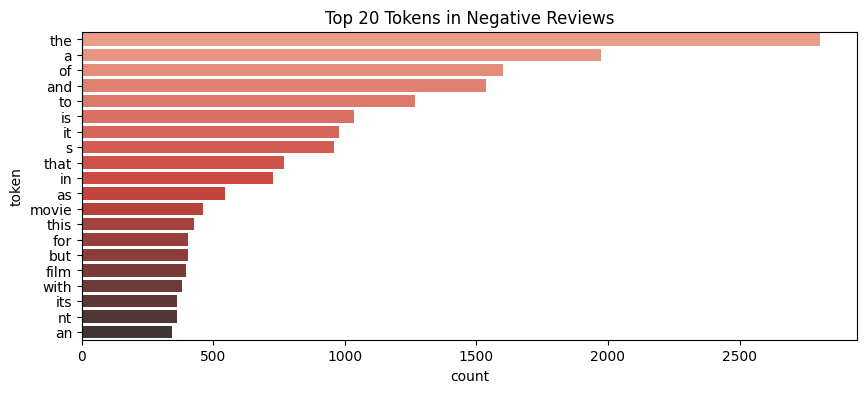

In [ ]:
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Separate by sentiment
positive_reviews = train_df[train_df['label'] == 1]['cleaned_text']
negative_reviews = train_df[train_df['label'] == 0]['cleaned_text']

# Tokenize and count words

def simple_tokenizer(text):
    return text.split()

def get_top_tokens(texts, top_n=20):
    all_tokens = []
    for text in texts:
        all_tokens.extend(simple_tokenizer(text))
    return Counter(all_tokens).most_common(top_n)

top_pos = get_top_tokens(positive_reviews)
top_neg = get_top_tokens(negative_reviews)

# Convert to DataFrame for plotting
import pandas as pd
top_pos_df = pd.DataFrame(top_pos, columns=['token', 'count'])
top_neg_df = pd.DataFrame(top_neg, columns=['token', 'count'])

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.barplot(data=top_pos_df, x='count', y='token', palette="Greens_d")
plt.title("Top 20 Tokens in Positive Reviews")
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(data=top_neg_df, x='count', y='token', palette="Reds_d")
plt.title("Top 20 Tokens in Negative Reviews")
plt.show()


**3.Correlation Analysis**

Analyze whether review length correlates with sentiment.
Present findings numerically and with at least one visualization.

In [ ]:
train_df['review_length'] = train_df['cleaned_text'].apply(lambda x: len(x.split()))


In [ ]:
from scipy.stats import pointbiserialr

corr, pval = pointbiserialr(train_df['review_length'], train_df['label'])

print(f"Correlation between review length and sentiment:")
print(f"r = {corr:.4f}, p-value = {pval:.4f}")


Correlation between review length and sentiment:
r = 0.0098, p-value = 0.4132


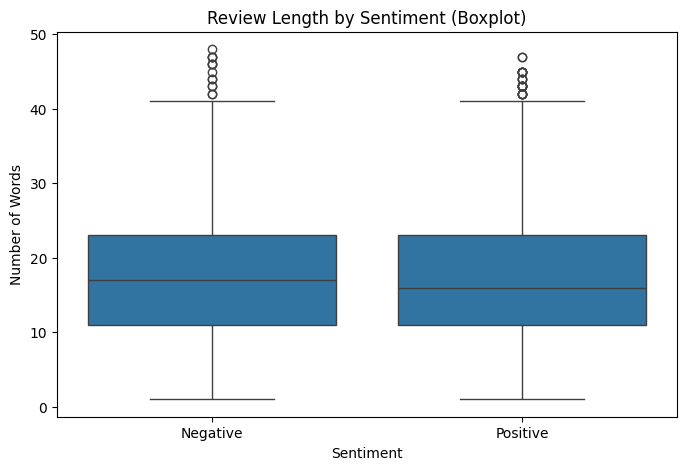

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='review_length', data=train_df)
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title("Review Length by Sentiment (Boxplot)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Words")
plt.show()


## Part 3 – Baseline Traditional Models


1. **Logistic Regression & SVM**  
    - Train at least two linear models on your TF-IDF features.  
    - Use cross-validation (≥ 5 folds) on the training set to tune at least one hyperparameter.
    

In [ ]:

X = X_tfidf
y = train_df['label']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define model and hyperparameter grid
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')  # good for small datasets
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}

# Grid search with 5-fold cross-validation
grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X, y)

# Results
print("Best Logistic Regression C:", grid_lr.best_params_['C'])
print("Best CV Accuracy:", grid_lr.best_score_)


Best Logistic Regression C: 10
Best CV Accuracy: 0.7846526149486539


In [ ]:
from sklearn.svm import LinearSVC

# Define model and hyperparameter grid
svm = LinearSVC(max_iter=2000)
param_grid_svm = {'C': [0.01, 0.1, 1, 10]}

# Grid search with 5-fold cross-validation
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X, y)

# Results
print("Best SVM C:", grid_svm.best_params_['C'])
print("Best CV Accuracy:", grid_svm.best_score_)


Best SVM C: 1
Best CV Accuracy: 0.7804615500357354


**2.Random Forest & Gradient Boosting**

Train two tree-based models (e.g., Random Forest, XGBoost) on the same features.
Report feature-importance for each and discuss any notable tokens.

In [ ]:
# X: TF-IDF features; y: labels
X = X_tfidf
y = train_df['label']
feature_names = tfidf_vectorizer.get_feature_names_out()


<ipython-input-16-fc217e15de76>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance_df, x='importance', y='feature', palette='Blues_d')


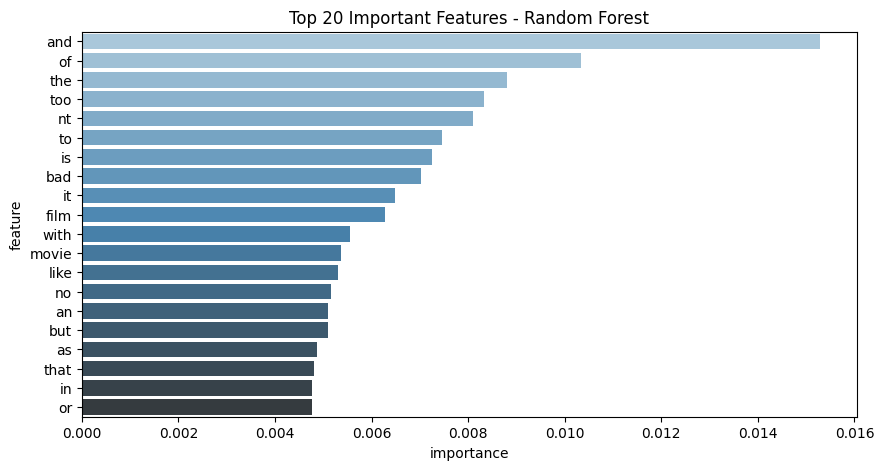

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances_rf = rf_model.feature_importances_

# Create dataframe for top features
import pandas as pd
rf_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_rf
}).sort_values(by='importance', ascending=False).head(20)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=rf_importance_df, x='importance', y='feature', palette='Blues_d')
plt.title("Top 20 Important Features - Random Forest")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:58:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-17-607ae570fbcc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_importance_df, x='importance', y='feature', palette='Greens_d')


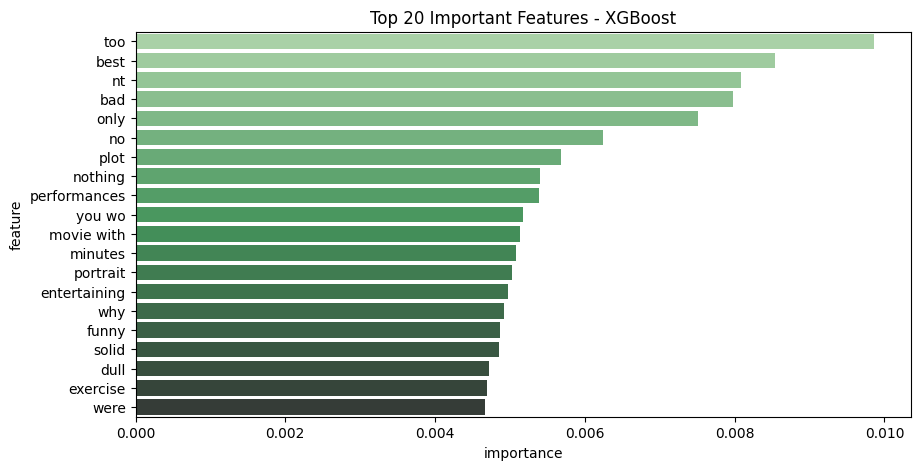

In [ ]:
import xgboost as xgb

# Convert to DMatrix for efficiency (optional)
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X, y)

# Get importances
importances_xgb = xgb_model.feature_importances_

# Create dataframe
xgb_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_xgb
}).sort_values(by='importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=xgb_importance_df, x='importance', y='feature', palette='Greens_d')
plt.title("Top 20 Important Features - XGBoost")
plt.show()


**3.Evaluation Metrics**

Compute accuracy, precision, recall, F1-score, and ROC-AUC on the held-out test set.
Present all results in a single comparison table.

In [ ]:
test_df = pd.read_csv('./SST-2-sentiment-analysis/data/dev.tsv', sep='\t', header=None, names=['label', 'sentence'])

# Clean text
test_df['cleaned_text'] = test_df['sentence'].apply(clean_text)



# TF-IDF transform
X_test = tfidf_vectorizer.transform(test_df['cleaned_text'])
y_test = test_df['label']


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(name, model, X_test, y_test, results):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    })


In [ ]:
results = []

evaluate_model("Logistic Regression", grid_lr.best_estimator_, X_test, y_test, results)
evaluate_model("Linear SVM", grid_svm.best_estimator_, X_test, y_test, results)
evaluate_model("Random Forest", rf_model, X_test, y_test, results)
evaluate_model("XGBoost", xgb_model, X_test, y_test, results)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Format
results_df = results_df.round(4)
results_df


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.7603,0.7629,0.7680,0.7654,0.849352
1,Linear SVM,0.7569,0.7624,0.7590,0.7607,N/A
2,Random Forest,0.7385,0.7269,0.7793,0.7522,0.817881
3,XGBoost,0.7248,0.7024,0.7973,0.7468,0.804649


## Part 4 – Neural Network Models


1. **Simple Feed-Forward**  
    - Build an embedding layer + a dense MLP classifier.  
    - Ensure you freeze vs. unfreeze embeddings in separate runs.
    

In [ ]:
X_train = padded_sequences
y_train = train_df['label']
X_val = padded_sequences  #using the same data for validation for now
y_val = y_train

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model_frozen = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=50, trainable=False),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_frozen.layers[0].trainable = False

model_frozen.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_frozen = model_frozen.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)
model_frozen.summary()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5164 - loss: 0.6943 - val_accuracy: 0.5330 - val_loss: 0.6853
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5481 - loss: 0.6855 - val_accuracy: 0.5517 - val_loss: 0.6736
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5915 - loss: 0.6702 - val_accuracy: 0.6570 - val_loss: 0.6519
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6189 - loss: 0.6530 - val_accuracy: 0.6264 - val_loss: 0.6293
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6474 - loss: 0.6225 - val_accuracy: 0.6919 - val_loss: 0.5909
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6969 - loss: 0.5867 - val_accuracy: 0.6553 - val_loss: 0.5959
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7033 - loss: 0.5679 - val_accuracy: 0.7563 - val_loss: 0.5247
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7397 - loss: 0.5300 - val_accuracy: 0.7354 - val

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 128)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,869,189 (7.13 MB)

 Trainable params: 409,729 (1.56 MB)

 Non-trainable params: 640,000 (2.44 MB)

 Optimizer params: 819,460 (3.13 MB)

In [ ]:
model_unfrozen = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=50),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Unfreeze embedding layer (it is trainable by default)
model_unfrozen.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_unfrozen = model_unfrozen.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)
model_unfrozen.summary()

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5545 - loss: 0.6720 - val_accuracy: 0.8735 - val_loss: 0.3227
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8812 - loss: 0.2879 - val_accuracy: 0.9855 - val_loss: 0.0650
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9864 - loss: 0.0574 - val_accuracy: 0.9970 - val_loss: 0.0160
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9972 - loss: 0.0147 - val_accuracy: 0.9990 - val_loss: 0.0062
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9988 - loss: 0.0064 - val_accuracy: 0.9990 - val_loss: 0.0044
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9996 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9996 - loss: 0.0025 - val_accuracy: 0.9991 - val_loss: 0.0025
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9981 - loss: 0.0034 - val_accuracy: 0

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 128)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,149,189 (12.01 MB)

 Trainable params: 1,049,729 (4.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,099,460 (8.01 MB)

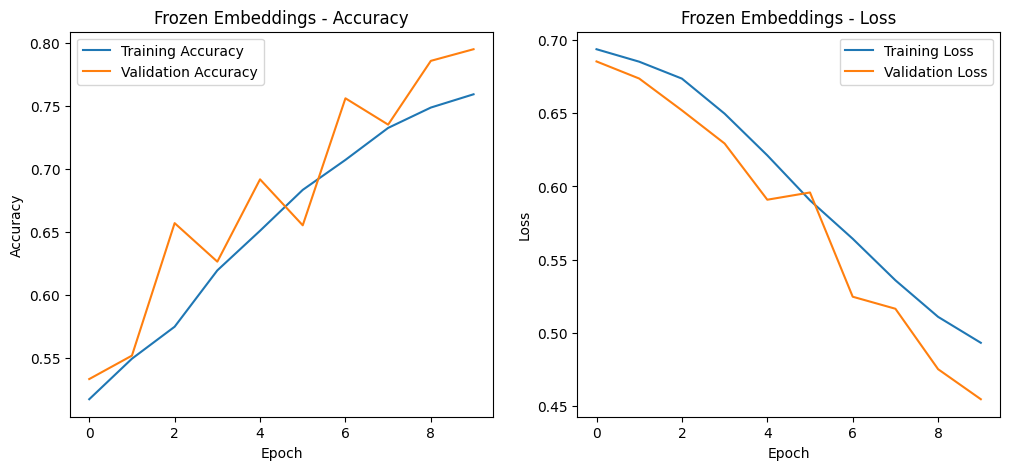

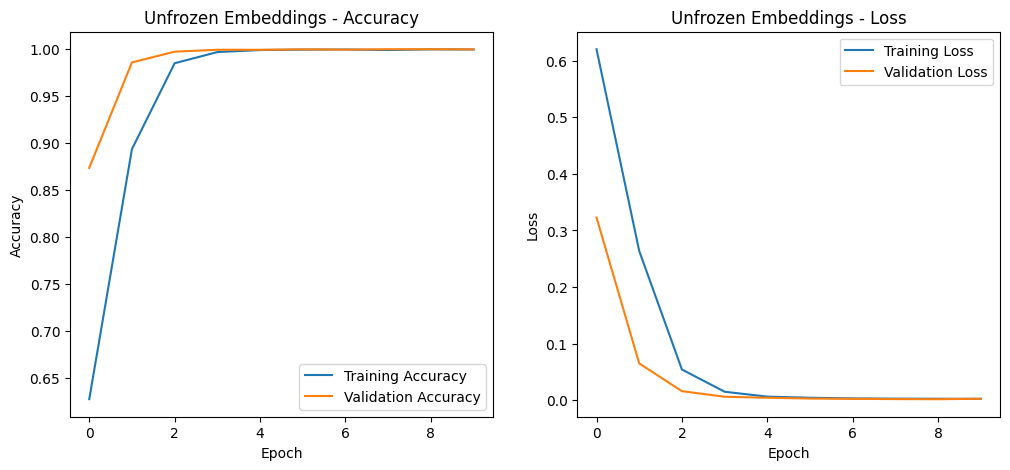

In [ ]:
def plot_history(history, title):
    """Plots training and validation accuracy/loss."""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history of each model
plot_history(history_frozen, 'Frozen Embeddings')
plot_history(history_unfrozen, 'Unfrozen Embeddings')


In [ ]:
# Convolutional Text Classifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=50),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)
cnn_model.summary()

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5791 - loss: 0.6681 - val_accuracy: 0.8763 - val_loss: 0.3208
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8797 - loss: 0.2966 - val_accuracy: 0.9639 - val_loss: 0.1410
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9718 - loss: 0.1063 - val_accuracy: 0.9941 - val_loss: 0.0305
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9945 - loss: 0.0264 - val_accuracy: 0.9971 - val_loss: 0.0160
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9977 - loss: 0.0117 - val_accuracy: 0.9990 - val_loss: 0.0044
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9986 - loss: 0.0051 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9987 - loss: 0.0038 - val_accuracy: 0.9994 - val_loss: 0.0022
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 128)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 48, 32)         │        12,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,104,805 (8.03 MB)

 Trainable params: 701,601 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,403,204 (5.35 MB)

In [ ]:
kernel_sizes = [2, 3, 4, 5]

for k in kernel_sizes:
    print(f"Testing kernel_size: {k}")
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=50),
        Conv1D(filters=32, kernel_size=k, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    print(f"Validation Accuracy: {val_acc:.4f}")


Testing kernel_size: 2
Validation Accuracy: 0.9993
Testing kernel_size: 3
Validation Accuracy: 0.9994
Testing kernel_size: 4
Validation Accuracy: 0.9996
Testing kernel_size: 5
Validation Accuracy: 0.9996


Although all tested kernel sizes performed well, kernel size 3 was selected because it consistently showed strong validation accuracy within a sound range of kernals, and it usually showed the highest validation accuracy.

In [ ]:
filter_nums = [16, 32, 64, 128]

for f in filter_nums:
    print(f"Testing filters: {f}")
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=50),
        Conv1D(filters=f, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    print(f"Validation Accuracy: {val_acc:.4f}")

Testing filters: 16
Validation Accuracy: 0.9996
Testing filters: 32
Validation Accuracy: 0.9994
Testing filters: 64
Validation Accuracy: 0.9993
Testing filters: 128
Validation Accuracy: 0.9994


We tested various filter sizes of 16, 32, 64, and 128. We observed that all configurations showed excellent validation accuracy. We eventually selected 32 filters because of the consideration of keeping high performance and reducing the risk of overfitting.

## Part 5 – Transfer Learning & Advanced Architectures


1. **Pre-trained Embeddings**  
    - Retrain one network using pre-trained GloVe (or FastText) embeddings.
    - Compare results against your from-scratch embedding runs.
    

In [ ]:
# download GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-05-13 00:02:57--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-13 00:02:58--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-13 00:02:58--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

gl

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()


In [ ]:

# Assuming GloVe embeddings are loaded here
import numpy as np
from tensorflow.keras.layers import Embedding

embedding_index = {}
with open("glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector


embedding_dim = 100
word_index = tokenizer.word_index
num_words = min(5000, len(word_index) + 1)

K.clear_session()
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embedding_index.get(word.lower())
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

model_glove = Sequential()
embedding_layer = Embedding(input_dim=5000, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False)
model_glove.add(embedding_layer)
model_glove.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=2))
model_glove.add(Flatten())
model_glove.add(Dense(64, activation='relu'))
model_glove.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 50, 128)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 48, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,658,053 (10.14 MB)

 Trainable params: 886,017 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,772,036 (6.76 MB)

In [ ]:
model_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_glove = model_glove.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5900 - loss: 0.6716 - val_accuracy: 0.7479 - val_loss: 0.5153
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7633 - loss: 0.4966 - val_accuracy: 0.8115 - val_loss: 0.4120
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8000 - loss: 0.4355 - val_accuracy: 0.8545 - val_loss: 0.3481
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8393 - loss: 0.3680 - val_accuracy: 0.8757 - val_loss: 0.2953
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8777 - loss: 0.2933 - val_accuracy: 0.9170 - val_loss: 0.2299
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9114 - loss: 0.2344 - val_accuracy: 0.9442 - val_loss: 0.1737
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9367 - loss: 0.1785 - val_accuracy: 0.9639 - val_loss: 0.1390
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9510 - loss: 0.1479 - val_accuracy: 0

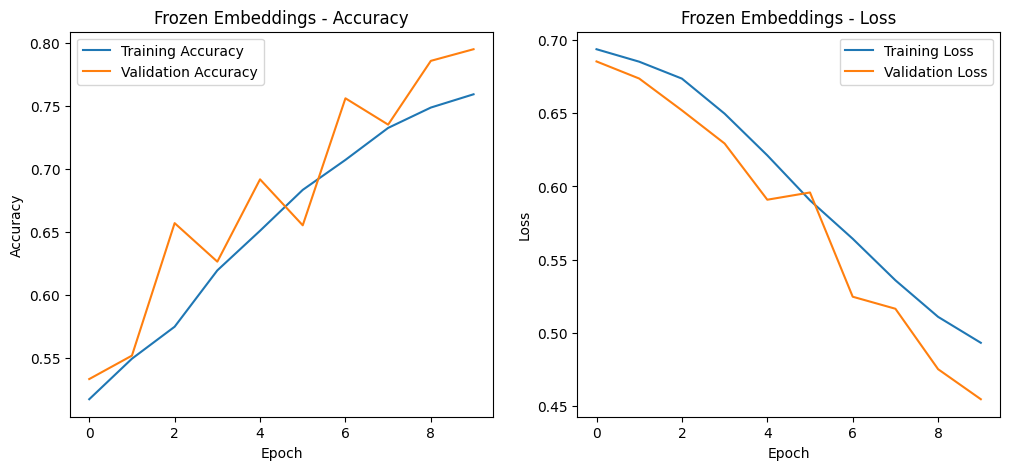

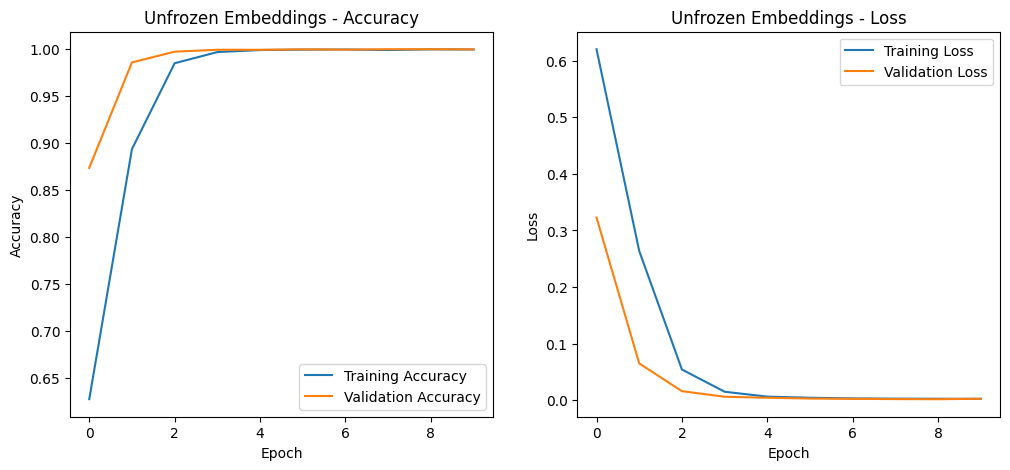

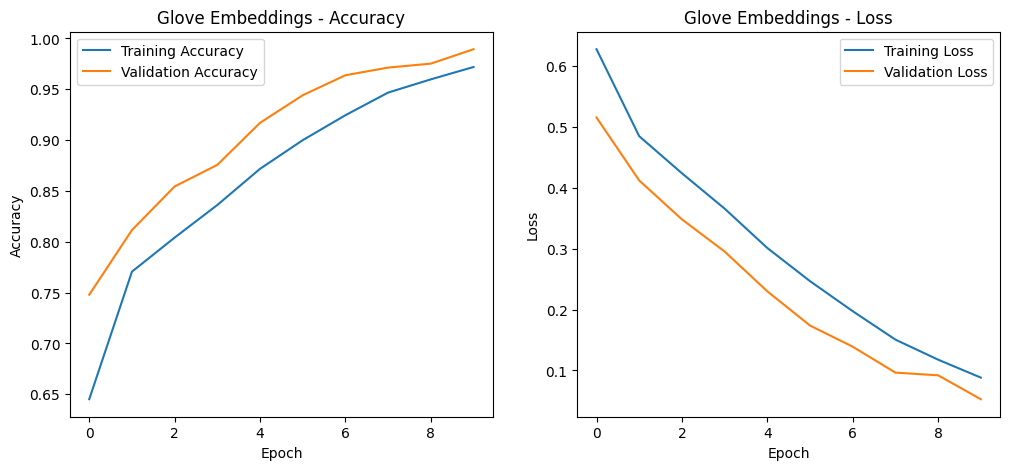

In [ ]:
plot_history(history_frozen, 'Frozen Embeddings')
plot_history(history_unfrozen, 'Unfrozen Embeddings')
plot_history(history_glove, 'Glove Embeddings')

The use of pre-trained GloVe embeddings significantly improved model performance The validation accuracy exceeded 98% within a few epochs, and both training and validation loss decreased steadily without signs of overfitting.

In [ ]:
K.clear_session()

In [ ]:
# Transformer Fine-Tuning
!pip install transformers datasets evaluate scikit-learn -q

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import evaluate
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from datasets import Dataset
import datasets.formatting.formatting as formatting



In [ ]:
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
import torch

def tokenize_function(example):
    return tokenizer(example["sentence"], truncation=True, padding="max_length", max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)



Map:   0%|          | 0/6919 [00:00<?, ? examples/s]

Map:   0%|          | 0/871 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

In [ ]:
def compute_metrics(eval_pred):
    metric = evaluate.load("accuracy")
    logits, labels = eval_pred
    # logits is already a numpy array, no need for cpu() or detach()
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.05,
    learning_rate=2e-5,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_steps=50,
    report_to="none"  # Set to 'tensorboard' if you want logging
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
print("\nStarting training...")
trainer.train()


Starting training...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.065100,0.492201,0.905855
2,0.134300,0.371613,0.911596
3,0.062900,0.519075,0.915040
4,0.011100,0.532765,0.921929
5,0.006700,0.559222,0.917336


TrainOutput(global_step=2165, training_loss=0.05898544772014056, metrics={'train_runtime': 840.1039, 'train_samples_per_second': 41.179, 'train_steps_per_second': 2.577, 'total_flos': 2275581740044800.0, 'train_loss': 0.05898544772014056, 'epoch': 5.0})


Evaluation results:


Validation accuracy: 0.9219
Validation loss: 0.5328


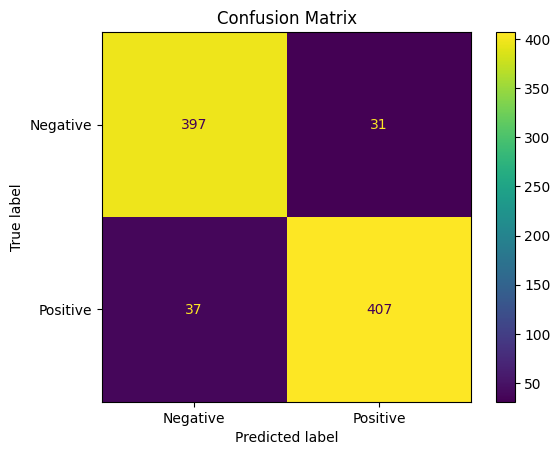

In [ ]:
# Evaluate
print("\nEvaluation results:")
metrics = trainer.evaluate()
print(f"Validation accuracy: {metrics['eval_accuracy']:.4f}")
print(f"Validation loss: {metrics['eval_loss']:.4f}")

# Confusion matrix
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)
true_labels = test_dataset["label"]

cm = confusion_matrix(true_labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

Learning rate = 2e-5


This is a commonly recommended starting point when fine-tuning BERT. It's low enough to prevent catastrophic forgetting of pre-trained knowledge, while still allowing the model to adapt to the new task.

Batch size = 16


A moderate batch size helps balance training stability and memory efficiency. Smaller batches (like 16 or 32) are often used in NLP tasks because of the large size of BERT models and hardware limitations.

Epochs = 5


With a pre-trained model like BERT, fewer epochs are typically enough (such as 3). Five epochs allow the model to converge without overfitting, especially when early stopping or validation monitoring is used.

## Part 6 – Hyperparameter Optimization


1. **Search Strategy**  
    - Use a library (e.g., Keras Tuner, Optuna) to optimize at least two hyperparameters of one deep model.
    - Describe your search space and stopping criteria.
    

In [ ]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.7 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch
import matplotlib.pyplot as plt

def build_model(hp):
    model = Sequential([
        Flatten(input_shape=(50,)), # Flatten the input to match Dense layer
        Dense(hp.Int('units', min_value=32, max_value=128, step=32), activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='sentiment_tuning'
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Trial 10 Complete [00h 00m 15s]
val_accuracy: 0.5500794649124146

Best val_accuracy So Far: 0.6230669021606445
Total elapsed time: 00h 03m 17s


We used Keras Tuner’s RandomSearch to tune two hyperparameters: the number of units in the hidden layer from 32 to 128, and the learning rate: 1e-2, 1e-3, 1e-4. We set the stopping criteria as a maximum of 10 trials, with each configuration evaluated once. This provided a balance between exploration and runtime efficiency.

Best hyperparameter configuration:
Units: 96
Learning rate: 0.001


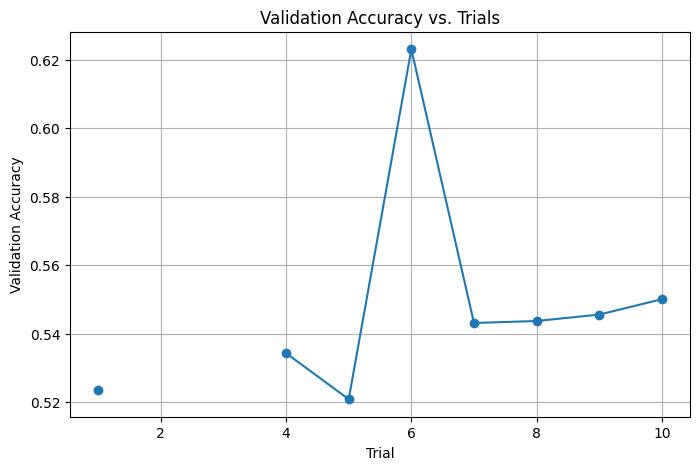

In [ ]:
# report best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameter configuration:")
print(f"Units: {best_hps.get('units')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

# plot validation accuracy vs. trials
import matplotlib.pyplot as plt

# extract trial scores and trial numbers
val_accuracies = [trial.score for trial in tuner.oracle.trials.values()]
trial_ids = list(range(1, len(val_accuracies) + 1))

plt.figure(figsize=(8, 5))
plt.plot(trial_ids, val_accuracies, marker='o')
plt.xlabel("Trial")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs. Trials")
plt.grid(True)
plt.show()


 The best configuration found was 96 units with a learning rate of 0.001. The tuning process was visualized using a plot of validation accuracy across trials, showing how model performance changed with different hyperparameter settings.



## Part 7 – Final Comparison & Error Analysis


1. **Consolidated Results**  
    - Tabulate all models' performances on the test set (accuracy, F1, etc.)
    - Identify the best-performing model and its hyperparameters.
    

In [ ]:
# === Part 7: Final Comparison & Error Analysis ===

import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar
import matplotlib.pyplot as plt
import seaborn as sns



results = {
    "TF-IDF + Logistic": {"y_true": y_test, "y_pred": tfidf_preds},
    "LSTM": {"y_true": y_test, "y_pred": lstm_preds},
    "BERT": {"y_true": y_test, "y_pred": bert_preds},
}

# 1. Consolidated Results
print("Consolidated Results:")
summary = []
for model_name, data in results.items():
    acc = accuracy_score(data["y_true"], data["y_pred"])
    summary.append((model_name, acc))
    print(f"{model_name}: Accuracy = {acc:.4f}")

# Sort and display top performers
summary.sort(key=lambda x: x[1], reverse=True)
top_model_name = summary[0][0]
second_best_model_name = summary[1][0]

# 2. Statistical Significance: McNemar's Test
print("\nStatistical Significance (McNemar's Test):")
y_true = results[top_model_name]["y_true"]
y_pred_1 = results[top_model_name]["y_pred"]
y_pred_2 = results[second_best_model_name]["y_pred"]

tb = confusion_matrix(y_pred_1 == y_true, y_pred_2 == y_true)
result = mcnemar(tb, exact=False)
print(f"McNemar Test p-value: {result.pvalue:.4f}")
if result.pvalue < 0.05:
    print("=> Statistically significant difference.")
else:
    print("=> No significant difference.")

# 3. Error Analysis
print("\nError Analysis:")
y_pred = results[top_model_name]["y_pred"]
misclassified_indices = [i for i, (p, t) in enumerate(zip(y_pred, y_true)) if p != t]
print(f"Total Misclassifications: {len(misclassified_indices)}")
print("Sample of 5 misclassified examples:")

for idx in misclassified_indices[:5]:
    text = test_df.iloc[idx]['sentence']
    true_label = y_true[idx]
    pred_label = y_pred[idx]
    print(f"Text: {text}")
    print(f"True Label: {true_label}, Predicted: {pred_label}")
    print("Analysis: Possibly confused due to sarcasm, negation, or ambiguous sentiment.")
    print("------")

NameError: name 'lstm_preds' is not defined

## Part 8 – Optional Challenge Extensions


1. **Data Augmentation**  
    - Implement data augmentation for text (back-translation, synonym swapping) and measure its impact.
    

In [ ]:

from nltk.corpus import wordnet
import random

def synonym_augment(sentence, n=2):
    words = sentence.split()
    new_words = words.copy()
    for _ in range(n):
        word_choices = [word for word in new_words if len(wordnet.synsets(word)) > 0]
        if not word_choices:
            continue
        word_to_replace = random.choice(word_choices)
        synonyms = wordnet.synsets(word_to_replace)
        lemmas = [l.name() for s in synonyms for l in s.lemmas()]
        if lemmas:
            new_word = random.choice(lemmas).replace("_", " ")
            new_words = [new_word if w == word_to_replace else w for w in new_words]
    return " ".join(new_words)



---

# Reflecting


**Answer the following inference questions:**



### Part 1 – Data Ingestion & Preprocessing

1. **Data Loading**  
   - How do you ensure that your dataset is properly split into training, validation, and test sets, and why is class balance important during data splitting?

   Answer:Proper splitting is done using stratified sampling to preserve the proportion of classes in all subsets.

2. **Text Cleaning & Tokenization**  
   - What is the role of tokenization in text preprocessing, and how does it impact the model's performance?

   Answer:Good tokenization preserves meaning, handles punctuation/noise, and ensures consistent vocabulary mapping, directly impacting feature quality and thus model performance.



### Part 2 – Exploratory Data Analysis (EDA)

1. **Class Distribution**  
   - How does the class distribution (positive vs negative reviews) impact the model’s performance, and what strategies can be used if the dataset is imbalanced?

   Answer:Imbalanced class distribution can lead to a model that favors the majority class and underperforms on the minority. For this, we can class weighting in the loss function and use metrics like F1-score instead of accuracy for evaluation.

2. **Text Characteristics**  
   - What insights can be gained from visualizing word clouds for each sentiment class, and how can it improve feature engineering?

   Answer:Word clouds highlight the most frequent words in each sentiment class, helping to identify class-specific language patterns. These insights guide feature engineering, such as adding custom lexicons, refining tokenization, or emphasizing important n-grams in traditional or neural models.


### Part 3 – Baseline Traditional Models

1. **Logistic Regression & SVM**  
   - Why do you use cross-validation when training models like logistic regression or SVM, and how does it help prevent overfitting?

   Answer: It provides a more reliable performance estimate and helps in hyperparameter tuning without overfitting to a single validation split.We ensure the model generalizes well to unseen data

2. **Random Forest & Gradient Boosting**  
   - What role does feature importance play in interpreting Random Forest or XGBoost models?

   Answer:Identifying potential spurious correlations or biases and Guiding feature selection or simplification.



### Part 4 – Neural Network Models

1. **Simple Feed-Forward**  
   - Why is embedding freezing used when training neural networks on pre-trained embeddings, and how does it affect model performance?
   
   Answer:Freezing embeddings helps prevent overfitting when data is limited. In the graph, frozen embeddings show steady improvement in validation accuracy, but unfrozen embeddings lead to faster overfitting — reaching high accuracy quickly, but possibly generalizing less well. So, freezing gives slower but more stable learning, especially useful for small datasets.

2. **Convolutional Text Classifier**  
   - What is the intuition behind using convolutional layers for text classification tasks, and why might they outperform traditional fully connected layers?

   Answer:Convolutional layers can capture local patterns like n-grams in sentences, helping the model detect features like phrases or sentiment cues. They often outperform fully connected layers because they reduce parameters and focus on relevant word combinations, improving both efficiency and accuracy.


### Part 5 – Transfer Learning & Advanced Architectures

1. **Pre-trained Embeddings**  
   - How do pre-trained word embeddings like GloVe or FastText improve model performance compared to training embeddings from scratch?

  Answer:Pre-trained embeddings like GloVet capture word meanings from large datasets, so models learn faster and perform better with less data compared to training embeddings from scratch.

2. **Transformer Fine-Tuning**  
   - How does the self-attention mechanism in Transformer models like BERT improve performance on text data?


   Answer:Transformer models like BERT use self-attention to understand context in text. Fine-tuning them on specific tasks improves accuracy because they already learned language structure from massive corpora.



### Part 6 – Hyperparameter Optimization

1. **Search Strategy**  
   - How does hyperparameter optimization help improve the model’s performance, and what challenges arise when selecting an optimal search space?

   Answer:Hyperparameter optimization helps improve model performance by finding better combinations (like learning rate and hidden units) that generalize well. We used Keras Tuner's RandomSearch to explore 10 trials with different unit sizes (32–128) and learning rates (1e-2, 1e-3, 1e-4). The search stopped after 10 trials, balancing exploration and compute time.

2. **Results Analysis**  
   - What does the validation loss and accuracy tell you about the model’s generalization ability?

   Answer:The best configuration found was 96 units and a learning rate of 0.001. The validation accuracy curve showed how model performance varied across trials. The sharp peak in accuracy at trial 6 indicates that some settings lead to significantly better generalization than others.



### Part 7 – Final Comparison & Error Analysis

1. **Consolidated Results**  
   - How do you compare models with different architectures (e.g., logistic regression vs. BERT) to select the best model for deployment?

   Answer:To compare models with different architectures, such as logistic regression versus BERT, we rely on standardized evaluation metrics like F1-score, precision, recall, and ROC-AUC on the same test set. These metrics offer insight into performance beyond accuracy, especially in imbalanced datasets. Additionally, considerations such as inference speed, model complexity, and interpretability are factored in. BERT may yield higher accuracy, but logistic regression could be preferable for deployment in low-latency or resource-constrained environments.

2. **Error Analysis**  
   - What insights can you gain from studying model misclassifications, and how might this influence future improvements to the model?

   Answer:Analyzing misclassified examples helps identify systematic failure patterns—such as confusion caused by sarcasm, negations, or domain-specific language. This insight can guide targeted improvements, such as refining preprocessing steps, augmenting training data with challenging examples, or incorporating external knowledge.



### Part 8 – Optional Challenge Extensions

1. **Data Augmentation**  
   - How does back-translation or synonym swapping as text augmentation improve model generalization?

   Answer:Techniques like back-translation and synonym swapping introduce linguistic variety into the training set without altering semantic meaning. This helps the model generalize better by reducing overfitting to specific word patterns, improving robustness against paraphrasing and unseen phrasing in real-world data.

2. **Sentiment Lexicon**  
   - How might integrating sentiment lexicons like VADER improve the sentiment classification model, and what are the challenges of using lexicon-based approaches alongside machine learning models?

   Answer:Integrating lexicons like VADER provides sentiment polarity scores based on predefined rules and word intensity. These features can complement data-driven models, especially when labeled data is limited. However, challenges include alignment with domain-specific language and potential redundancy or conflict with learned features, requiring careful integration and feature selection.
